<a href="https://colab.research.google.com/github/shahparam11/ML-Project/blob/main/heart_disease_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Importing Libraries**



In [ ]:
import pandas as pd

# **2. Importing Dataset**

In [ ]:
data = pd.read_csv('heart.csv')

# **3. Taking care of Missing Values**

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# **4. Taking care of Duplicate values**

In [ ]:
data_dup = data.duplicated().any()
data_dup

True

In [ ]:
data = data.drop_duplicates()

In [ ]:
data_dup = data.duplicated().any()
data_dup

False

# **5. Data Processing**

In [ ]:
cate_val= []
cont_val = []

for column in data.columns:
  if data[column].nunique() <= 10:
    cate_val.append(column)
  else:
    cont_val.append(column)

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# **6. Encoding Categorical Data**

In [ ]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# **7. Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


# **Splitting The Dataset Into The training Set And Test Set**

In [ ]:
x = data.drop('target',axis = 1)

In [ ]:
y = data['target']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state= 42)

In [ ]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,-1.153610,1,1,-0.091401,-0.532247,0,0,1.680713,0,-0.899544,2,0,2
349,0.839089,0,2,-0.091401,0.319348,0,1,-2.299069,0,0.135360,1,1,3
135,0.396267,0,0,2.189843,-0.416120,1,0,-0.156110,1,1.515232,1,2,1
389,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
66,-0.157260,1,2,-0.091401,-0.958045,1,0,0.106294,0,0.135360,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1,1.391408,-0.029032,0,0,-0.287311,0,-0.899544,2,0,2
123,1.171205,0,2,0.478910,3.299932,1,0,0.324963,0,-0.209608,2,1,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
274,1.281911,1,0,1.619532,-0.358057,0,0,-0.505981,0,1.084022,2,0,1


In [ ]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# **9. Logistics Regression 78.6%**



In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
 log = LogisticRegression()
 log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred1 = log.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred1)

0.7868852459016393

# **10. SVC Support Vector classifier 80.32%**

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(x_train,y_train)

SVC()

In [ ]:
y_pred2 = svm.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

# **11.KNeighbors Classifier 72.77%**



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred3 = knn.predict(x_test)
accuracy_score(y_test, y_pred3)

0.7377049180327869

In [ ]:
score =[]
for k in range(1,40):
  knn = KNeighborsClassifier(n_neighbors =k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(accuracy_score(y_test, y_pred))


In [ ]:
score

[0.6885245901639344,
 0.7704918032786885,
 0.7377049180327869,
 0.7704918032786885,
 0.7377049180327869,
 0.7213114754098361,
 0.7540983606557377,
 0.7377049180327869,
 0.7704918032786885,
 0.7704918032786885,
 0.8032786885245902,
 0.819672131147541,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7868852459016393,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7704918032786885,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393]

# **12.Impoved KNN accuracy to 80.32%**

In [ ]:
  knn = KNeighborsClassifier(n_neighbors =2)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  accuracy_score(y_test, y_pred)

0.7704918032786885

# **13.Non-Linear ML Algorithms**
So for below Ml algorithms pre-processing is not required, so again we will tarin our data as we require sex, target as well

In [ ]:
data = pd.read_csv('heart.csv')
data
data = data.drop_duplicates()
data.shape


(302, 14)

In [ ]:
x = data.drop('target',axis=1)
y = data['target']


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state=42)

# **14.Decision Tree Classifer 75.40%**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred4 = dt.predict(x_test)
accuracy_score(y_test,y_pred4)

0.7377049180327869

## **15.Random Forect Classifier 85.24%**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred5 = rf.predict(x_test)
accuracy_score(y_test, y_pred5)

0.8360655737704918

# **16.Gradient Boosting Classifier 80.32%**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred6 = gbc.predict(x_test)
accuracy_score(y_test,y_pred6)

0.8032786885245902

# 17.Comparing between models , which has highest accuracy

In [ ]:
final_data = pd.DataFrame({'Models': ['LR','SVM','KNN','DT','RF','GB'],
                           'ACCURACY':[accuracy_score(y_test,y_pred1),
                                       accuracy_score(y_test,y_pred2),
                                       accuracy_score(y_test,y_pred3),
                                       accuracy_score(y_test,y_pred4),
                                       accuracy_score(y_test,y_pred5),
                                       accuracy_score(y_test,y_pred6)
                                      ]})

In [ ]:
final_data

,Models,ACCURACY
0,LR,0.786885
1,SVM,0.836066
2,KNN,0.737705
3,DT,0.737705
4,RF,0.836066
5,GB,0.803279


# **18.Visualisation of Data**

In [ ]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACCURACY'>

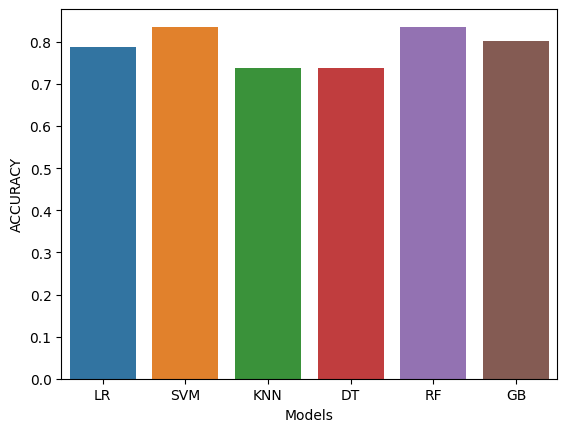

In [ ]:
sns.barplot(x=final_data['Models'],y=final_data['ACCURACY'])

# 19.Now, I am training my best data model for more higher accuracy

In [ ]:
x= data.drop('target', axis=1)
y =data['target']

In [ ]:
x.shape

(302, 13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

# **20.Predictiom of Data**

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
    'slope':2,
    'ca':2,
    'thal':3,
},index=[0])

In [ ]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [ ]:
p = rf.predict(new_data)
if p[0] == 0:
  print("Yayy 😁,you do not show any Symptoms of Heart Disease")
else:
  print("SOORY 🥺,you have a heart Disease")

Yayy 😁,you do not show any Symptoms of Heart Disease


# **21.Saving Model using JOBLIB**

In [ ]:
import joblib

In [ ]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [ ]:
model = joblib.load('model_joblib_heart')

In [ ]:
model.predict(new_data)

array([0])

# **22. Front End**

In [ ]:
!apt-get install python3-tk

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
python3-tk is already the newest version (3.10.8-1~22.04).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [ ]:
import tkinter as tk
import joblib

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np

def show_entry_fields(b):
    p1 = int(entry_fields[0].value)
    p2 = int(entry_fields[1].value)
    p3 = int(entry_fields[2].value)
    p4 = int(entry_fields[3].value)
    p5 = int(entry_fields[4].value)
    p6 = int(entry_fields[5].value)
    p7 = int(entry_fields[6].value)
    p8 = int(entry_fields[7].value)
    p9 = int(entry_fields[8].value)
    p10 = float(entry_fields[9].value)
    p11 = int(entry_fields[10].value)
    p12 = int(entry_fields[11].value)
    p13 = int(entry_fields[12].value)

    model = joblib.load('model_joblib_heart')
    result = model.predict([[p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])

    if result == 0:
        result_label.value = "YAYYY 😁, No Heart Disease"
    else:
        result_label.value = "😢 Probably you might have Heart Disease"

# Creating input widgets
entry_fields = [widgets.FloatText(value=0, description="Age"),
               widgets.FloatText(value=0, description="Male Or Female [1/0]"),
               widgets.FloatText(value=0, description="CP"),
               widgets.FloatText(value=0, description="trestbps"),
               widgets.FloatText(value=0, description="chol"),
               widgets.FloatText(value=0, description="fbs"),
               widgets.FloatText(value=0, description="restecg"),
               widgets.FloatText(value=0, description="thalach"),
               widgets.FloatText(value=0, description="exang"),
               widgets.FloatText(value=0.0, description="oldpeak"),
               widgets.FloatText(value=0, description="slope"),
               widgets.FloatText(value=0, description="ca"),
               widgets.FloatText(value=0, description="thal")]

# CreatING a button widget
predict_button = widgets.Button(description='Predict')
predict_button.on_click(show_entry_fields)

# CreatING a label widget to display the result
result_label = widgets.Label(value="")

# Creat nga UI container
input_ui = widgets.VBox(entry_fields + [predict_button, result_label])

# Displaying the UI
display(input_ui)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
